<a href="https://colab.research.google.com/github/DataCrusade1999/Quantitative-Analytics/blob/master/Quantitative_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [59]:
url='https://raw.githubusercontent.com/DataCrusade1999/Python/master/Data/aapl.csv'

In [60]:
aapl=pd.read_csv(url)
#aapl['diff']=aapl.Open-aapl.Close

**PERFORMING EDA ON DATA**

In [61]:
print(aapl.head(5))

         Date       High        Low       Open      Close     Volume  Adj Close
0  2006-10-02  10.838572  10.614285  10.728572  10.694285  178159800   9.241351
1  2006-10-03  10.707143  10.455714  10.635715  10.582857  197677200   9.145061
2  2006-10-04  10.780000  10.451428  10.585714  10.768572  207270700   9.305547
3  2006-10-05  10.880000  10.590000  10.647142  10.690000  170970800   9.237648
4  2006-10-06  10.720000  10.544286  10.631429  10.602858  116739700   9.162347


In [62]:
print(aapl.tail(5))

            Date       High        Low  ...      Close    Volume  Adj Close
1318  2011-12-23  57.655716  57.070000  ...  57.618572  67349800  49.790466
1319  2011-12-27  58.441429  57.574287  ...  58.075714  66269000  50.185513
1320  2011-12-28  58.321430  57.334286  ...  57.520000  57165500  49.705292
1321  2011-12-29  57.950001  57.215714  ...  57.874287  53994500  50.011452
1322  2011-12-30  58.040001  57.641430  ...  57.857143  44915500  49.996635

[5 rows x 7 columns]


In [63]:
print(aapl.shape)

(1323, 7)


In [64]:
print(aapl.columns)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [65]:
print(aapl.describe())

              High          Low  ...        Volume    Adj Close
count  1323.000000  1323.000000  ...  1.323000e+03  1323.000000
mean     29.237566    28.507684  ...  1.882896e+08    24.964252
std      14.199012    14.029758  ...  1.027007e+08    12.201417
min      10.568571    10.371428  ...  3.937360e+07     9.040131
25%      17.752857    17.182143  ...  1.122037e+08    15.063183
50%      25.642857    24.725714  ...  1.629866e+08    21.707180
75%      39.132858    38.351429  ...  2.316230e+08    33.442190
max      60.957142    59.427143  ...  8.432424e+08    52.124886

[8 rows x 6 columns]


In [66]:
print(aapl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1323 non-null   object 
 1   High       1323 non-null   float64
 2   Low        1323 non-null   float64
 3   Open       1323 non-null   float64
 4   Close      1323 non-null   float64
 5   Volume     1323 non-null   int64  
 6   Adj Close  1323 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.5+ KB
None


In [67]:
print(aapl.isnull())

       Date   High    Low   Open  Close  Volume  Adj Close
0     False  False  False  False  False   False      False
1     False  False  False  False  False   False      False
2     False  False  False  False  False   False      False
3     False  False  False  False  False   False      False
4     False  False  False  False  False   False      False
...     ...    ...    ...    ...    ...     ...        ...
1318  False  False  False  False  False   False      False
1319  False  False  False  False  False   False      False
1320  False  False  False  False  False   False      False
1321  False  False  False  False  False   False      False
1322  False  False  False  False  False   False      False

[1323 rows x 7 columns]


In [68]:
print(aapl.index)

RangeIndex(start=0, stop=1323, step=1)


In [69]:
print(aapl.iloc[[1,2], [0,2,3,4]])

         Date        Low       Open      Close
1  2006-10-03  10.455714  10.635715  10.582857
2  2006-10-04  10.451428  10.585714  10.768572


In [70]:
print(aapl.sample(20))

            Date       High        Low  ...      Close     Volume  Adj Close
908   2010-05-12  37.590000  36.957142  ...  37.441429  163594900  32.354610
501   2008-09-29  17.097143  14.370000  ...  15.037143  655514300  12.994185
750   2009-09-24  26.814285  26.110001  ...  26.260000  137720100  22.692297
925   2010-06-07  37.021427  35.792858  ...  35.848572  221735500  30.978167
885   2010-04-09  34.555714  34.351429  ...  34.541428   83545700  29.848612
359   2008-03-07  17.568571  17.007143  ...  17.464285  307615700  15.091578
490   2008-09-12  21.558571  20.928572  ...  21.277143  198256800  18.386414
1022  2010-10-22  44.291428  43.757141  ...  43.924286   93194500  37.956703
492   2008-09-16  20.357143  18.878571  ...  19.982857  299959100  17.267975
332   2008-01-29  18.969999  18.435715  ...  18.791430  274995700  16.238411
1305  2011-12-06  56.375713  55.625713  ...  55.849998   70899500  48.262188
782   2009-11-09  28.842857  28.037144  ...  28.780001  132213900  24.869932

ANALYSING RETURNS

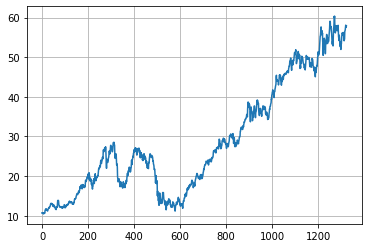

In [71]:
aapl['Close'].plot(grid=True)
plt.show()

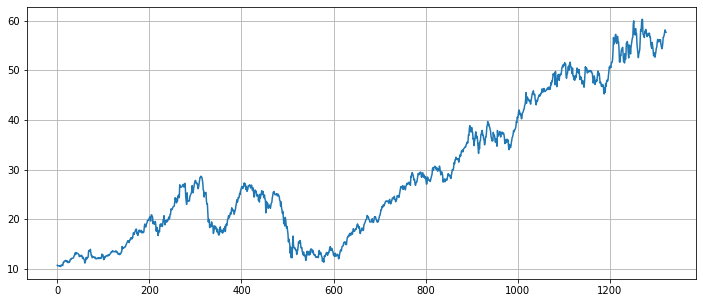

In [72]:
aapl['Open'].plot(grid=True,figsize=(12,5))
plt.show()

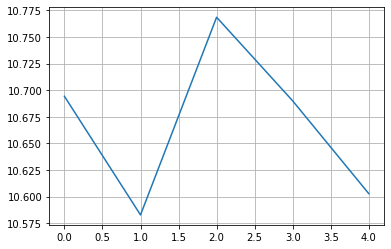

In [73]:
aapl['Close'].head(5).plot(grid=True)
plt.show()

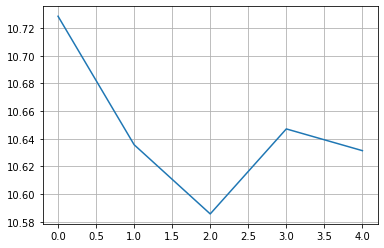

In [74]:
aapl['Open'].head(5).plot(grid=True)
plt.show()

In [75]:
daily_close=aapl[['Adj Close']]
daily_pct_change=daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change.head(10))

   Adj Close
0   0.000000
1  -0.010419
2   0.017549
3  -0.007297
4  -0.008152
5   0.005524
6  -0.010988
7  -0.007858
8   0.027721
9  -0.003189


In [76]:
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns.head(10))

   Adj Close
0        NaN
1  -0.010474
2   0.017397
3  -0.007323
4  -0.008185
5   0.005509
6  -0.011048
7  -0.007889
8   0.027344
9  -0.003194


In [77]:
#prefer this method while calculating daily percent change
daily_pct_change = daily_close / daily_close.shift(1) - 1
print(daily_pct_change.head(10))

   Adj Close
0        NaN
1  -0.010419
2   0.017549
3  -0.007297
4  -0.008152
5   0.005524
6  -0.010988
7  -0.007858
8   0.027721
9  -0.003189


In [78]:
daily_log_returns_shift=np.log(daily_close / daily_close.shift(1))
print(daily_log_returns_shift.head(10))

   Adj Close
0        NaN
1  -0.010474
2   0.017397
3  -0.007323
4  -0.008185
5   0.005509
6  -0.011048
7  -0.007889
8   0.027344
9  -0.003194


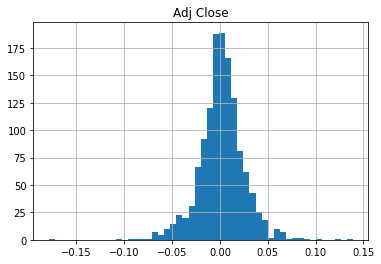

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139049


In [79]:
daily_pct_change.hist(bins=50)
plt.show()
print(daily_pct_change.describe())

In [80]:
cum_daily_return=(1+daily_pct_change).cumprod()
print(cum_daily_return.head(10))

   Adj Close
0        NaN
1   0.989581
2   1.006947
3   0.999599
4   0.991451
5   0.996928
6   0.985974
7   0.978226
8   1.005344
9   1.002137


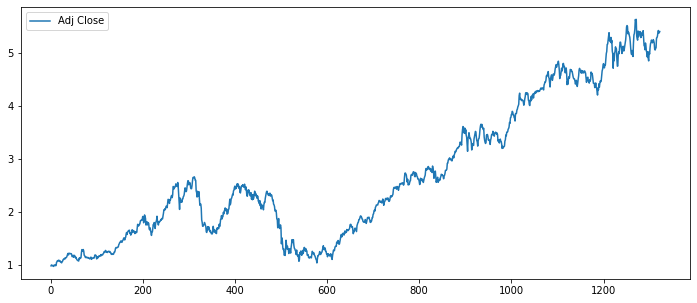

In [81]:
cum_daily_return.plot(figsize=(12,5))
plt.show()

In [82]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['GS', 'ORCL', 'BB','AAPL','BLK']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
print(all_data)

                         High         Low  ...     Volume   Adj Close
Ticker Date                                ...                       
GS     2006-10-02  171.449997  168.509995  ...  4143700.0  141.645538
       2006-10-03  174.399994  170.100006  ...  5823500.0  144.558304
       2006-10-04  176.660004  173.309998  ...  8069400.0  146.516724
       2006-10-05  176.520004  174.690002  ...  5749400.0  145.637100
       2006-10-06  176.000000  173.800003  ...  4898200.0  145.761581
...                       ...         ...  ...        ...         ...
BLK    2011-12-23  178.729996  175.000000  ...   313100.0  140.809265
       2011-12-27  179.770004  177.020004  ...   310700.0  140.359421
       2011-12-28  177.880005  175.899994  ...   301000.0  139.254456
       2011-12-29  179.500000  176.550003  ...   342200.0  141.590637
       2011-12-30  179.429993  177.869995  ...   252200.0  140.675156

[6615 rows x 6 columns]


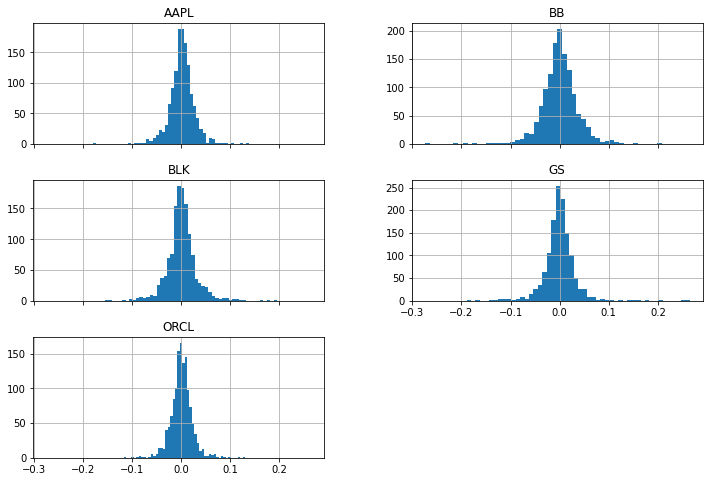

In [83]:
daily_close_nStocks=all_data[['Adj Close']].reset_index().pivot('Date','Ticker','Adj Close')
daily_pct_change=daily_close_nStocks.pct_change()
daily_pct_change.hist(bins=50,sharex=True,figsize=(12,8))
plt.show()

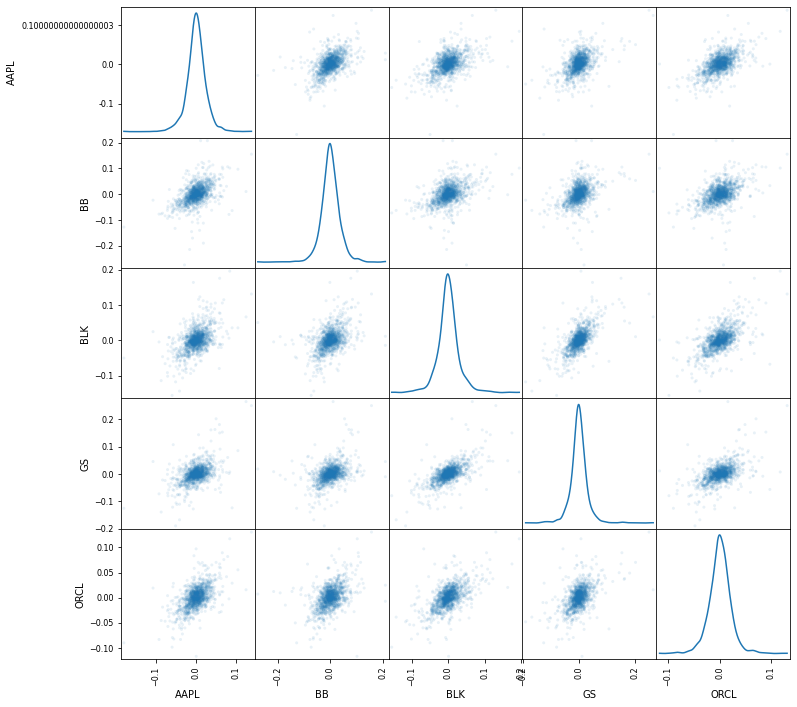

In [84]:
pd.plotting.scatter_matrix(daily_pct_change,diagonal='kde',figsize=(12,12),alpha=0.1)
plt.show()

In [85]:
daily_log_returns=np.log(daily_close_nStocks/daily_close_nStocks.shift(1))
print(daily_log_returns.head(10))

Ticker          AAPL        BB       BLK        GS      ORCL
Date                                                        
2006-10-02       NaN       NaN       NaN       NaN       NaN
2006-10-03 -0.010474  0.020389  0.000828  0.020355  0.013498
2006-10-04  0.017396  0.063852  0.017998  0.013457  0.014972
2006-10-05 -0.007323  0.011151  0.011128 -0.006022  0.004940
2006-10-06 -0.008185 -0.011243 -0.000537  0.000854 -0.003841
2006-10-09  0.005509  0.043264  0.006689  0.010195  0.019598
2006-10-10 -0.011048 -0.007511  0.024234  0.007915  0.010190
2006-10-11 -0.007889 -0.009804 -0.007773  0.000615 -0.008574
2006-10-12  0.027343 -0.005569 -0.004139  0.014093  0.021826
2006-10-13 -0.003194  0.024994 -0.015794  0.012809  0.004204


MOVING WINDOWS

In [86]:
print(all_data[['Adj Close']].rolling(40).var())

                   Adj Close
Ticker Date                 
GS     2006-10-02        NaN
       2006-10-03        NaN
       2006-10-04        NaN
       2006-10-05        NaN
       2006-10-06        NaN
...                      ...
BLK    2011-12-23  40.236098
       2011-12-27  43.040584
       2011-12-28  44.509345
       2011-12-29  43.819276
       2011-12-30  44.408666

[6615 rows x 1 columns]


In [87]:
print(all_data[['Adj Close']].rolling(40).std())

                   Adj Close
Ticker Date                 
GS     2006-10-02        NaN
       2006-10-03        NaN
       2006-10-04        NaN
       2006-10-05        NaN
       2006-10-06        NaN
...                      ...
BLK    2011-12-23   6.343193
       2011-12-27   6.560532
       2011-12-28   6.671532
       2011-12-29   6.619613
       2011-12-30   6.663983

[6615 rows x 1 columns]


In [88]:
print(all_data[['Adj Close']].rolling(40).mean())

                    Adj Close
Ticker Date                  
GS     2006-10-02         NaN
       2006-10-03         NaN
       2006-10-04         NaN
       2006-10-05         NaN
       2006-10-06         NaN
...                       ...
BLK    2011-12-23  129.192283
       2011-12-27  129.378090
       2011-12-28  129.770960
       2011-12-29  130.374710
       2011-12-30  130.847527

[6615 rows x 1 columns]


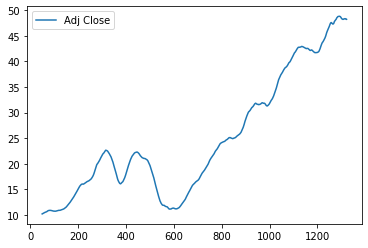

In [89]:
moving_average=aapl[['Adj Close']].rolling(50).mean()
moving_average.plot()
plt.show()

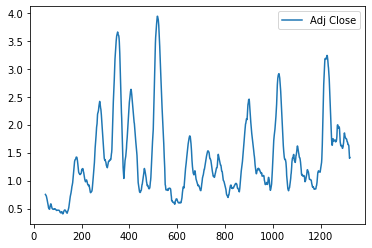

In [90]:
moving_std=aapl[['Adj Close']].rolling(50).std()
moving_std.plot()
plt.show()

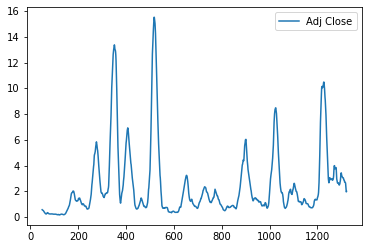

In [91]:
moving_var=aapl[['Adj Close']].rolling(50).var()
moving_var.plot()
plt.show()

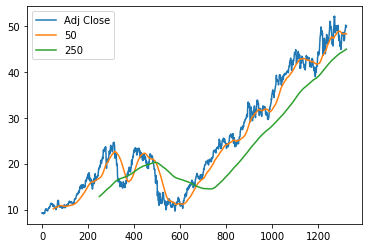

In [92]:
adj_close=aapl[['Adj Close']]
aapl['50']=adj_close.rolling(50).mean()
aapl['250']=adj_close.rolling(250).mean()
aapl[['Adj Close','50','250']].plot()
plt.show()

VOLATILITY CALCULATIONS

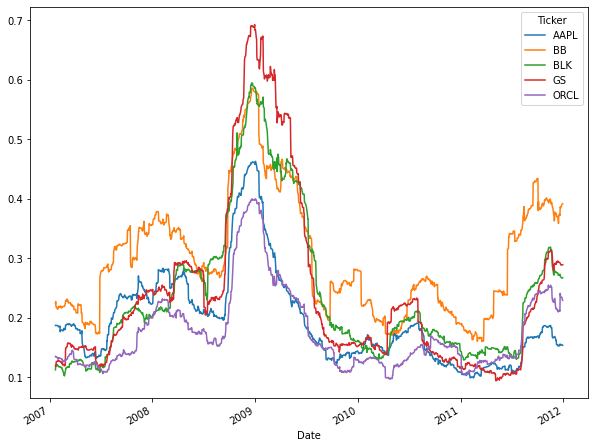

In [93]:
volatility=daily_pct_change.rolling(75).std()*np.sqrt(75)
volatility.plot(figsize=(10,8))
plt.show()

**Ordinary Least-Squares Regression (OLS)**



In [94]:
AAPL_returns=daily_log_returns.iloc[:,0]
GS_returns=daily_log_returns.iloc[:,3]
return_data=pd.concat([AAPL_returns,GS_returns],axis=1)[1:]
X = sm.add_constant(return_data['AAPL'])
model = sm.OLS(return_data['GS'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     GS   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     400.3
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           5.49e-78
Time:                        07:02:56   Log-Likelihood:                 2852.3
No. Observations:                1322   AIC:                            -5701.
Df Residuals:                    1320   BIC:                            -5690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.635      0.1

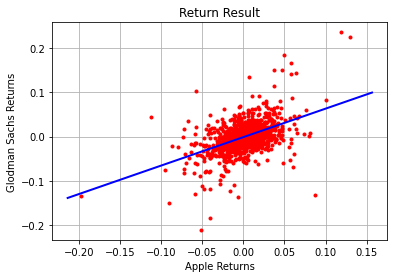

In [95]:
plt.plot(return_data['AAPL'],return_data['GS'],'r.')
ax = plt.axis()
x = np.linspace(ax[0] , ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', linewidth=2)
plt.grid(True)
plt.xlabel('Apple Returns')
plt.ylabel('Glodman Sachs Returns')
plt.title('Return Result')
plt.show()

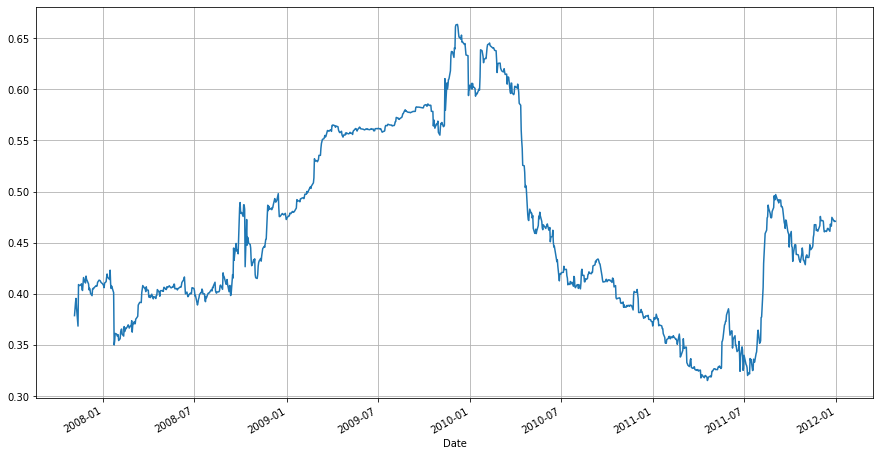

In [96]:
return_data['GS'].rolling(275).corr(return_data['AAPL']).plot(grid=True,figsize=(15,8))
plt.show()

**TRADING STRATEGY** (MOVING AVERAGE CROSSOVER)

**Remember that when you go long, you think that the stock price will go up and will sell at a higher price in the future (= buy signal); When you go short, you sell your stock, expecting that you can buy it back at a lower price and realize a profit (= sell signal).**

In [100]:
url='https://raw.githubusercontent.com/DataCrusade1999/Python/master/Data/BLK.csv'
BLK=pd.read_csv(url)
print(BLK.head())

         Date     Open     High      Low    Close  Adj Close  Volume
0  1999-10-12  14.0625  14.1250  14.0000  14.1250   9.491266   49200
1  1999-10-13  14.1250  14.3750  14.0000  14.0625   9.449268   49900
2  1999-10-14  14.0000  14.0625  13.2500  13.6250   9.155289  430900
3  1999-10-15  13.1250  13.1875  12.6875  13.0625   8.777325  158200
4  1999-10-18  13.0000  13.0000  12.5000  12.8125   8.609335   83800


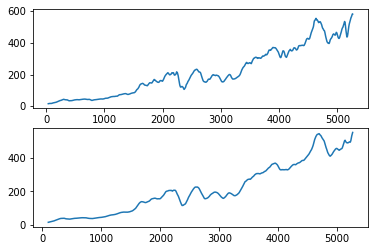

In [101]:
Short_av=BLK['Close'].rolling(40).mean()
plt.subplot(211)
Short_av.plot()
Long_av=BLK['Close'].rolling(100).mean()
plt.subplot(212)
Long_av.plot()
plt.show()

**After you have calculated the mean average of the short and long windows, you should create a signal when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average window. In Python, this will result in a condition: signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:]. Note that you add the [short_window:] to comply with the condition “only for the period greater than the shortest moving average window”. When the condition is true, the initialized value 0.0 in the signal column will be overwritten with 1.0. A “signal” is created! If the condition is false, the original value of 0.0 will be kept and no signal is generated. You use the NumPy where() function to set up this condition. Much the same like you read just now, the variable to which you assign this result is signals['signal'][short_window], because you only want to create signals for the period greater than the shortest moving average window!
Lastly, you take the difference of the signals in order to generate actual trading orders. In other words, in this column of your signals DataFrame, you’ll be able to distinguish between long and short positions, whether you’re buying or selling stock.**

In [103]:
Short_Window=50
Long_Window=100
signals=pd.DataFrame(index=BLK.index)
signals['signal']=0.0
signals['short_mov_avg']=BLK['Close'].rolling(window=Short_Window,min_periods=1,center=False).mean()
signals['long_mov_avg']=BLK['Close'].rolling(window=Long_Window,min_periods=1,center=False).mean()
signals['signal'][Short_Window:]=np.where(signals['short_mov_avg'][Short_Window:]>signals['long_mov_avg'][Short_Window:],1.0,0.0)
signals['positions']=signals['signal'].diff()
print(signals.sample(20))

      signal  short_mov_avg  long_mov_avg  positions
3176     1.0     190.794001    190.698101        0.0
327      1.0      41.761250     40.430000        0.0
1285     1.0      73.440400     69.624100        0.0
2441     1.0     155.994000    135.913200        0.0
1674     1.0     141.621800    139.068100        0.0
2781     1.0     162.855000    158.273800        0.0
4502     1.0     425.469201    411.758200        0.0
1336     1.0      77.741800     75.594200        0.0
2730     0.0     153.924200    168.815200        0.0
3736     1.0     315.271400    309.724700        0.0
4666     1.0     538.848197    537.529098        0.0
1417     0.0      75.046400     77.377800        0.0
1647     1.0     142.876801    131.777400        0.0
4286     1.0     363.526999    358.501099        0.0
306      1.0      43.071250     39.671250        0.0
3071     1.0     162.532801    158.815400        0.0
4987     1.0     458.808599    454.194800        0.0
3708     1.0     308.950199    306.803399     